#Analyzing Financial Statements in Python

*Enter any Ticker symbol you want to analyze. This workboook is NOT financial advice, it is a way of breaking down pieces of the financial statement and visualizing preformance. We will be using Disney stock as an example throughout the notebook.*

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from google.colab import files
import matplotlib.pyplot as plt
from matplotlib.dates import num2date
import pandas_datareader.data as web
import yfinance as yf
import plotly.graph_objs as go
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

ticker = 'dis'
stock = yf.Ticker(ticker)

## Stock Information

In [ ]:
print(f"Company: {stock.info['longName']}")
print(f"Previous Close: {stock.info['previousClose']}")
print(f"Market Cap: {stock.info['marketCap']}")
print("")
print(f"PEG ratio: {stock.info['pegRatio']}")
print(f"PE Ratio: {stock.info['trailingPE']}")
print(f"Price to Sales Ratio: {stock.info['priceToSalesTrailing12Months']}")
print(f"ROA: {stock.info['returnOnAssets']}")
print(f"ROE: {stock.info['returnOnEquity']}")
print(f"Free Cash Flow: {stock.info['freeCashflow']}")
print(f"Book Value: {stock.info['bookValue']}")
print(f"Price to book: {stock.info['priceToBook']}")

Company: The Walt Disney Company
Previous Close: 101.5
Market Cap: 184509874176

PEG ratio: 1.18
PE Ratio: 110.010864
Price to Sales Ratio: 2.0684268
ROA: 0.0341
ROE: 0.02716
Free Cash Flow: 8282375168
Book Value: 54.355
Price to book: 1.8620182


# Annual Financial Statement Analysis

## The Balance Sheet


---



Let's clean reports and make a new dataframe which converts our numbers into graphable values in Billions.

bs: Balance Sheet

ics: Income Statement

cfs: Cash Flow Statement


In [ ]:
def clean_statements(stmt):
  stmt = stmt.T
  stmt = stmt.sort_index()
  return(stmt)

bs = clean_statements(stock.balance_sheet)
ics = clean_statements(stock.income_stmt)
cfs = clean_statements(stock.cash_flow)

In [ ]:
bs_billions = (bs/1e9).round(2)
## adding ratios after billion conversion
bs['Current RATIO'] = bs['Current Assets']/bs['Current Liabilities']
bs['Debt to Equity RATIO'] = bs['Total Liabilities Net Minority Interest'] / bs['Stockholders Equity']
bs_billions['Current RATIO'] = bs['Current Assets']/bs['Current Liabilities']
bs_billions['Debt to Equity RATIO'] = bs['Total Liabilities Net Minority Interest'] / bs['Stockholders Equity']

##### Printing the full balance sheet

In [ ]:
bs

,Treasury Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Capital Lease Obligations,Common Stock Equity,Total Capitalization,Total Equity Gross Minority Interest,Minority Interest,Stockholders Equity,Gains Losses Not Affecting Retained Earnings,Other Equity Adjustments,Treasury Stock,Retained Earnings,Capital Stock,Common Stock,Preferred Stock,Total Liabilities Net Minority Interest,Total Non Current Liabilities Net Minority Interest,Other Non Current Liabilities,Preferred Securities Outside Stock Equity,Employee Benefits,Non Current Pension And Other Postretirement Benefit Plans,Non Current Deferred Liabilities,Non Current Deferred Taxes Liabilities,Long Term Debt And Capital Lease Obligation,Long Term Capital Lease Obligation,Long Term Debt,Current Liabilities,Other Current Liabilities,Current Deferred Liabilities,Current Deferred Revenue,Current Debt And Capital Lease Obligation,Current Debt,Payables And Accrued Expenses,Current Accrued Expenses,Payables,Total Tax Payable,Income Tax Payable,Accounts Payable,Total Assets,Total Non Current Assets,Other Non Current Assets,Non Current Deferred Assets,Investments And Advances,Investmentin Financial Assets,Long Term Equity Investment,Goodwill And Other Intangible Assets,Other Intangible Assets,Goodwill,Net PPE,Accumulated Depreciation,Gross PPE,Leases,Construction In Progress,Other Properties,Machinery Furniture Equipment,Buildings And Improvements,Land And Improvements,Properties,Current Assets,Other Current Assets,Current Deferred Assets,Prepaid Assets,Inventory,Receivables,Receivables Adjustments Allowances,Other Receivables,Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Cash And Cash Equivalents,Current RATIO,Debt to Equity RATIO
2019-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8963000000.0,4783000000.0,4783000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1166000000.0,NaN,NaN,21265000000.0,58589000000.0,NaN,NaN,NaN,NaN,4597000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30,19000000.0,1807063365.0,1826063365.0,40714000000.0,61539000000.0,-13279000000.0,142211000000.0,8623000000.0,-13279000000.0,2911000000.0,83583000000.0,136500000000.0,97512000000.0,13929000000.0,83583000000.0,-8322000000.0,-8322000000.0,907000000.0,38315000000.0,54497000000.0,54497000000.0,0.0,104037000000.0,77409000000.0,7842000000.0,9249000000.0,6451000000.0,6451000000.0,7288000000.0,7288000000.0,55828000000.0,2911000000.0,52917000000.0,26628000000.0,4116000000.0,4116000000.0,4116000000.0,5711000000.0,5711000000.0,16801000000.0,3618000000.0,13183000000.0,NaN,NaN,13183000000.0,201549000000.0,166298000000.0,8433000000.0,25022000000.0,3903000000.0,1271000000.0,2632000000.0,96862000000.0,19173000000.0,77689000000.0,32078000000.0,-35517000000.0,67595000000.0,NaN,4449000000.0,62111000000.0,NaN,62111000000.0,1035000000.0,0.0,35251000000.0,875000000.0,NaN,2171000000.0,1583000000.0,12708000000.0,-426000000.0,1835000000.0,11299000000.0,17914000000.0,17914000000.0,1.323832,1.244715
2021-09-30,19000000.0,1818000000.0,1837000000.0,38447000000.0,57635000000.0,-6633000000.0,142959000000.0,2580000000.0,-6633000000.0,3229000000.0,88553000000.0,137093000000.0,102224000000.0,13671000000.0,88553000000.0,-6440000000.0,-6440000000.0,907000000.0,40429000000.0,55471000000.0,55471000000.0,0.0,101385000000.0,70308000000.0,7161000000.0,9213000000.0,4132000000.0,4132000000.0,7246000000.0,7246000000.0,51769000000.0,3229000000.0,48540000000.0,31077000000.0,4317000000.0,4317000000.0,4317000000.0,5866000000.0,5866000000.0,20894000000.0,4537000000.0,16357000000.0,NaN,NaN,16357000000.0,203609000000.0,169952000000.0,8658000000.0,29549000000.0,3935000000.0,1297000000.0,2638000000.0,95186000000.0,17115000000.0,78071000000.0,32624000000.0,-37920000000.0,70544000000.0,1058000000.0,4

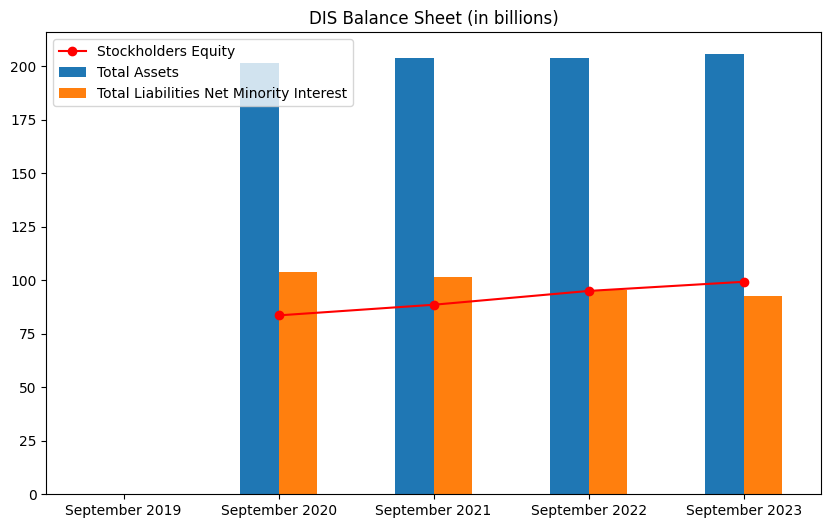

In [ ]:
plt.rcParams['figure.figsize'] = (10,6)
ax = bs_billions['Stockholders Equity'].plot(y='Stockholders Equity', linestyle='-', marker='o', use_index=False, color='red', legend=True)
bs_billions[['Total Assets','Total Liabilities Net Minority Interest']].plot(y=['Total Assets','Total Liabilities Net Minority Interest'], kind='bar', ax=ax)

plt.xticks(range(len(bs.index)),
           [t.to_pydatetime().strftime("%B %Y") for t in bs_billions.index],rotation = 360)
plt.title(ticker.upper() +' Balance Sheet (in billions)')
plt.show()

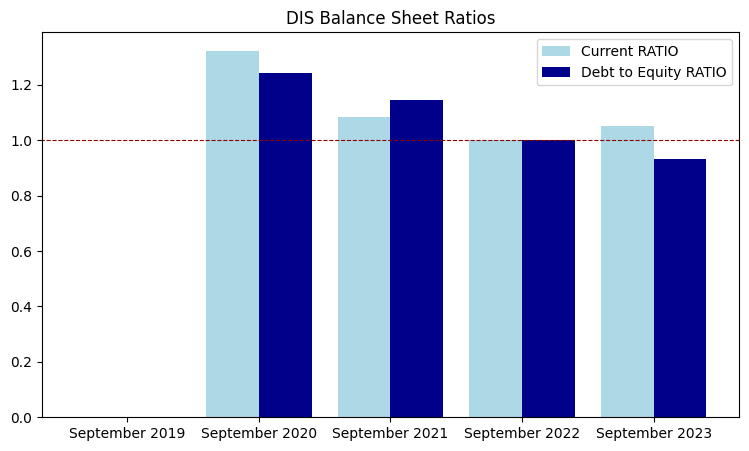

In [ ]:
plt.rcParams['figure.figsize'] = (9,5)
ax = bs[['Current RATIO', 'Debt to Equity RATIO']].plot(kind='bar', width=.8, color=['lightblue', 'darkblue'])
ax.plot([-2, 5], [1, 1], color='darkred',linestyle='--', linewidth=.8)
plt.xticks(range(len(bs.index)),
           [t.to_pydatetime().strftime("%B %Y") for t in bs_billions.index],rotation = 360)
plt.title(ticker.upper()+' Balance Sheet Ratios')
plt.show()

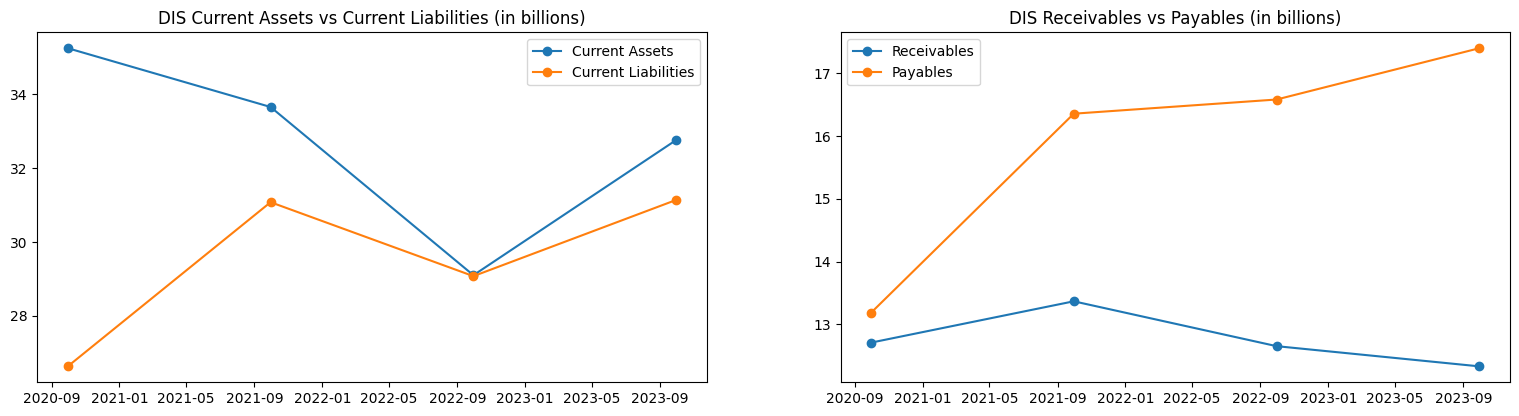

In [ ]:
plt.rcParams['figure.figsize'] = (19,10)
fig = plt.figure()

ax1 = plt.subplot(2, 2, 1)
plt.plot(bs_billions.index.values, bs_billions[['Current Assets', 'Current Liabilities']], marker='o')
ax1.legend(['Current Assets', 'Current Liabilities'])

ax2 = plt.subplot(2, 2, 2)
plt.plot(bs_billions.index.values, bs_billions[['Receivables', 'Payables']] , marker='o')
ax2.legend(['Receivables', 'Payables'])

ax1.title.set_text(ticker.upper()+' Current Assets vs Current Liabilities (in billions)')
ax2.title.set_text(ticker.upper()+' Receivables vs Payables (in billions)')
plt.show()

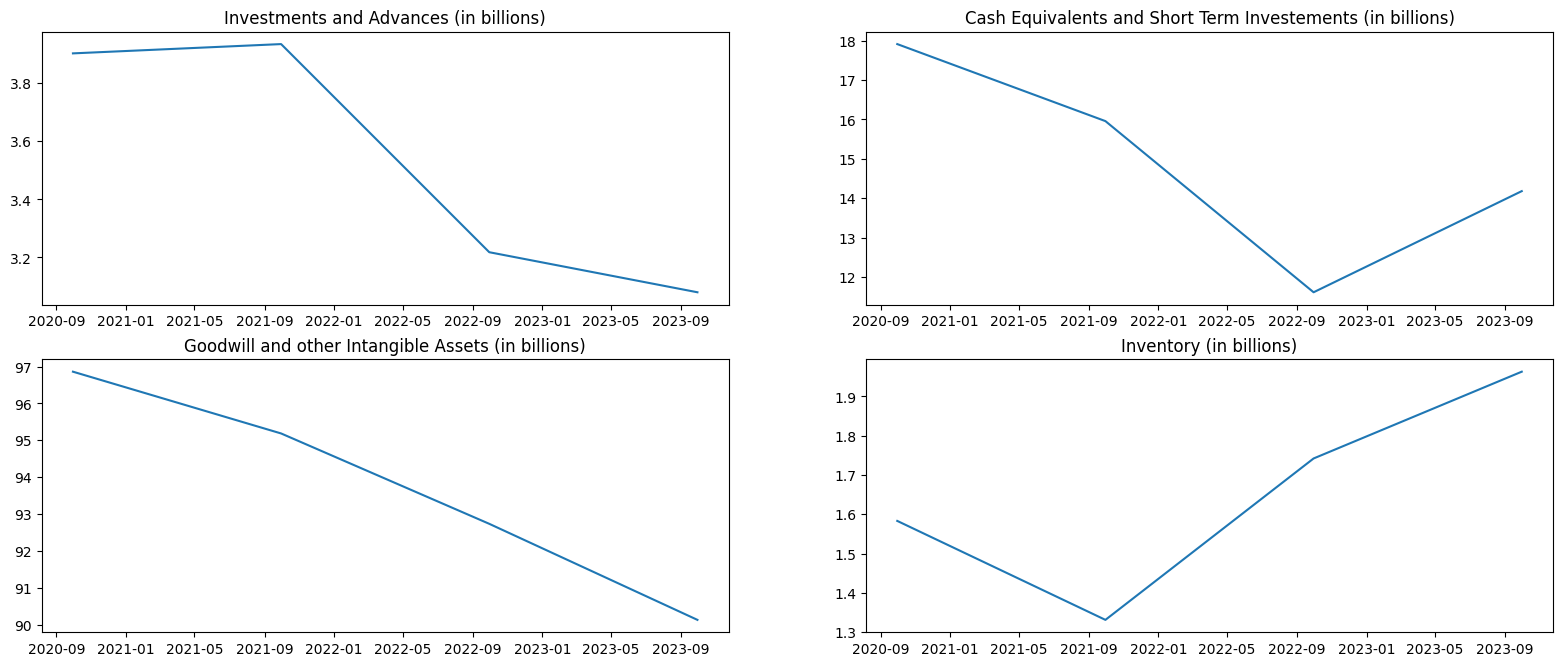

In [ ]:
plt.rcParams['figure.figsize'] = (19.5,7.8)
fig = plt.figure()

ax1 = plt.subplot(2, 2, 1)
plt.plot(bs_billions.index.values, bs_billions['Investments And Advances'])

ax2 = plt.subplot(2, 2, 2)
plt.plot(bs_billions.index.values, bs_billions['Cash Cash Equivalents And Short Term Investments'])

ax3 = plt.subplot(2, 2, 3)
plt.plot(bs_billions.index.values, bs_billions['Goodwill And Other Intangible Assets'])

ax4 = plt.subplot(2, 2, 4)
plt.plot(bs_billions.index.values, bs_billions['Inventory'])

ax1.title.set_text('Investments and Advances (in billions)')
ax2.title.set_text('Cash Equivalents and Short Term Investements (in billions)')
ax3.title.set_text('Goodwill and other Intangible Assets (in billions)')
ax4.title.set_text('Inventory (in billions)')
plt.show()

## The Income Statement
---


##### Printing the income statement

In [ ]:
ics

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,Interest Income,Normalized Income,Net Income From Continuing And Discontinued Operation,Total Expenses,Diluted Average Shares,Basic Average Shares,Diluted EPS,Basic EPS,Diluted NI Availto Com Stockholders,Net Income Common Stockholders,Net Income,Minority Interests,Net Income Including Noncontrolling Interests,Net Income Discontinuous Operations,Net Income Continuous Operations,Tax Provision,Pretax Income,Other Income Expense,Other Non Operating Income Expenses,Special Income Charges,Gain On Sale Of Ppe,Gain On Sale Of Business,Other Special Charges,Restructuring And Mergern Acquisition,Earnings From Equity Interest,Gain On Sale Of Security,Net Non Operating Interest Income Expense,Interest Expense Non Operating,Interest Income Non Operating,Operating Income,Operating Expense,Depreciation Amortization Depletion Income Statement,Depreciation And Amortization In Income Statement,Selling General And Administration,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2019-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28000000.0,NaN,465000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30,-1548450000.0,0.27,10828000000.0,-5735000000.0,-5735000000.0,-2832000000.0,5345000000.0,43880000000.0,5093000000.0,-252000000.0,-1491000000.0,1491000000.0,156000000.0,1354550000.0,-2864000000.0,61594000000.0,1808000000.0,1808000000.0,-1.58,-1.58,-2864000000.0,-2864000000.0,-2864000000.0,-390000000.0,-2474000000.0,-32000000.0,-2442000000.0,699000000.0,-1743000000.0,-4046000000.0,1038000000.0,-5735000000.0,NaN,0.0,-973000000.0,5735000000.0,651000000.0,1038000000.0,-1491000000.0,1491000000.0,156000000.0,3794000000.0,17714000000.0,5345000000.0,5345000000.0,12369000000.0,21508000000.0,43880000000.0,65388000000.0,65388000000.0
2021-09-30,-6540000.0,0.01,9732000000.0,-654000000.0,-654000000.0,2024000000.0,5111000000.0,45131000000.0,9078000000.0,3967000000.0,-1406000000.0,1406000000.0,140000000.0,2671460000.0,1995000000.0,63759000000.0,1828000000.0,1816000000.0,1.09,1.1,1995000000.0,1995000000.0,1995000000.0,-512000000.0,2507000000.0,-29000000.0,2536000000.0,25000000.0,2561000000.0,308000000.0,201000000.0,-654000000.0,NaN,312000000.0,NaN,654000000.0,761000000.0,-111000000.0,-1406000000.0,1406000000.0,140000000.0,3659000000.0,18628000000.0,5111000000.0,5111000000.0,13517000000.0,22287000000.0,45131000000.0,67418000000.0,67418000000.0
2022-09-30,-295200000.0,0.328,12897000000.0,-900000000.0,-900000000.0,3193000000.0,5163000000.0,54401000000.0,11997000000.0,6834000000.0,-1397000000.0,1549000000.0,152000000.0,3797800000.0,3145000000.0,75952000000.0,1827000000.0,1822000000.0,1.72,1.73,3145000000.0,3145000000.0,3145000000.0,-360000000.0,3505000000.0,-48000000.0,3553000000.0,1732000000.0,5285000000.0,-88000000.0,-4000000.0,-237000000.0,NaN,0.0,NaN,237000000.0,816000000.0,-663000000.0,-1397000000.0,1549000000.0,152000000.0,6770000000.0,21551000000.0,5163000000.0,5163000000.0,16388000000.0,28321000000.0,54401000000.0,82722000000.0,82722000000.0
2023-09-30,-1075947000.0,0.289,15834000000.0,-3723000000.0,-3723000000.0,2354000000.0,5369000000.0,59201000000.0,12111000000.0,6742000000.0,-1209000000.0,1973000000.0,764000000.0,5001053000.0,2354000000.0,79906000000.0,1830000000.0,1828000000.0,1.29,1.29,2354000000.0,2354000000.0,2354000000.0,-1036000000.0,3390000000.0,0.0,3390000000.0,1379000000.0,4769000000.0,-3014000000.0,-73000000.0,-3892000000.0,NaN,NaN,NaN,3892000000.0,782000000.0,169000000.0,-1209000000.0,1973000000.0,764000000.0,8992000000.0,20705000000.0,5369000000.0,5369000000.0,15336000000.0,29697000000.0,59201000000.0,88898000000.0,88898000000.0


Convert income statement into billions, we will have to revert EPS and tax rate as they do not need to be converted into billions.

In [ ]:
ics_billions = (ics/1e9).round(2)
ics_billions['Basic EPS']  = ics_billions['Basic EPS'] * 1e9
ics_billions['Diluted EPS'] = ics_billions['Diluted EPS'] * 1e9
ics_billions['Tax Rate For Calcs'] = ics_billions['Tax Rate For Calcs'] * 1e9

Let's calculate Ratios related to the income statement.

In [ ]:
ics['ROE%'] = (ics['Net Income'] / bs['Stockholders Equity']) *100
ics_billions['ROE%'] = (ics['Net Income'] / bs['Stockholders Equity']) *100

ics['Gross Profit Margin'] = (ics['Gross Profit'] / ics['Total Revenue']) *100
ics_billions['Gross Profit Margin'] = (ics['Gross Profit'] / ics['Total Revenue']) *100

ics['Operating Profit Margin'] = ics['Operating Income'] / ics['Total Revenue'] *100
ics_billions['Operating Profit Margin'] = ics['Operating Income'] / ics['Total Revenue'] *100

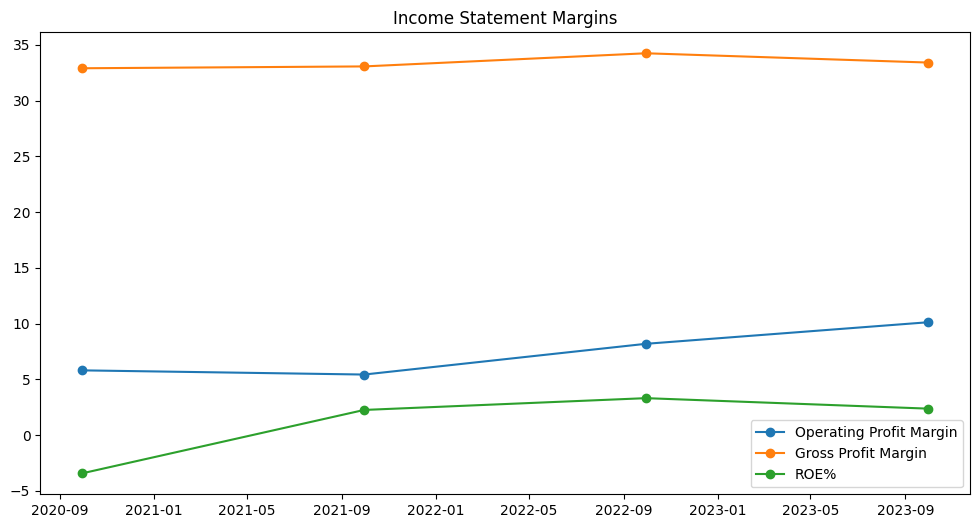

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
fig = plt.figure()
plt.plot(ics_billions.index.values, ics_billions[['Operating Profit Margin', 'Gross Profit Margin', 'ROE%']], marker='o')
plt.legend(['Operating Profit Margin', 'Gross Profit Margin', 'ROE%'])
plt.title('Income Statement Margins')
plt.show()

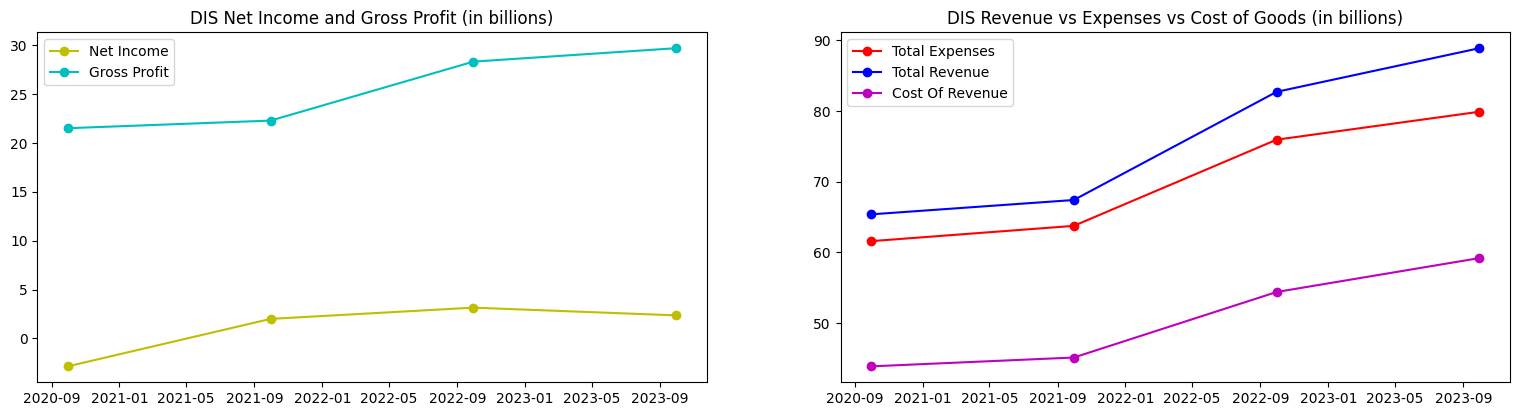

In [ ]:
plt.rcParams['figure.figsize'] = (19,10)
fig = plt.figure()

ax1 = plt.subplot(2, 2, 1)
plt.plot(ics_billions.index.values, ics_billions['Net Income'], marker='o', color='y')
plt.plot(ics_billions.index.values, ics_billions['Gross Profit'], marker='o', color='c')
ax1.legend(['Net Income', 'Gross Profit'])

ax2 = plt.subplot(2, 2, 2)
plt.plot(ics_billions.index.values, ics_billions['Total Expenses'], marker='o', color='r')
plt.plot(ics_billions.index.values, ics_billions['Total Revenue'], marker='o', color='b')
plt.plot(ics_billions.index.values, ics_billions['Cost Of Revenue'], marker='o', color='m')
ax2.legend(['Total Expenses', 'Total Revenue', 'Cost Of Revenue'])

ax1.title.set_text(ticker.upper()+' Net Income and Gross Profit (in billions)')
ax2.title.set_text(ticker.upper()+' Revenue vs Expenses vs Cost of Goods (in billions)')
plt.show()

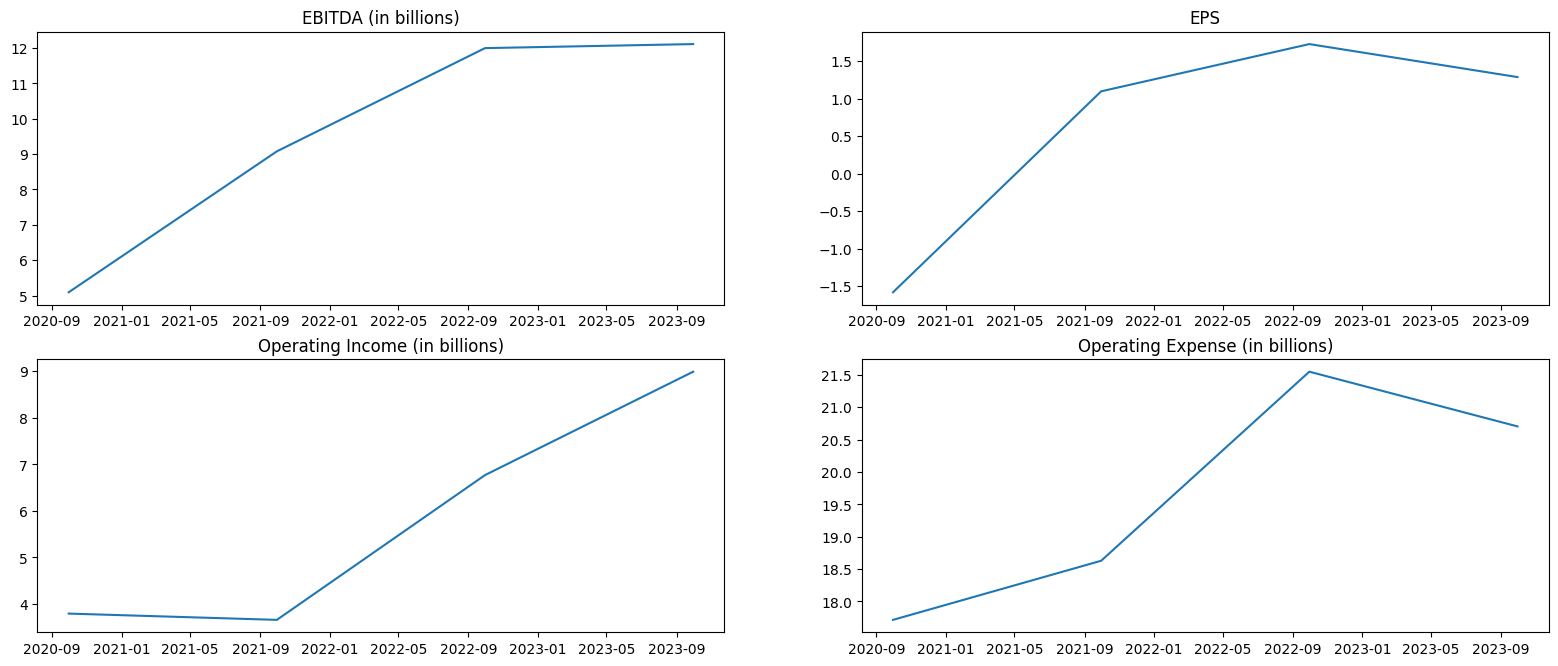

In [ ]:
plt.rcParams['figure.figsize'] = (19.5,7.8)
fig = plt.figure()

ax1 = plt.subplot(2, 2, 1)
plt.plot(ics_billions.index.values, ics_billions['EBITDA'])

ax2 = plt.subplot(2, 2, 2)
plt.plot(ics_billions.index.values, ics_billions['Basic EPS'])

ax3 = plt.subplot(2, 2, 3)
plt.plot(ics_billions.index.values, ics_billions['Operating Income'])

ax4 = plt.subplot(2, 2, 4)
plt.plot(ics_billions.index.values, ics_billions['Operating Expense'])

ax1.title.set_text('EBITDA (in billions)')
ax2.title.set_text('EPS')
ax3.title.set_text('Operating Income (in billions)')
ax4.title.set_text('Operating Expense (in billions)')
plt.show()

## The Cash Flow Statement
---





##### Printing the full cash flow statement

In [ ]:
cfs_billions = (cfs/1e9).round(2)
cfs['Operating Cash Flow Ratio'] = cfs['Cash Flow From Continuing Operating Activities']/bs['Current Liabilities']
cfs_billions['Operating Cash Flow Ratio'] = cfs['Cash Flow From Continuing Operating Activities']/bs['Current Liabilities']
cfs

,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Capital Expenditure,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,Effect Of Exchange Rate Changes,Changes In Cash,Cash Flow From Discontinued Operation,Financing Cash Flow,Cash From Discontinued Financing Activities,Cash Flow From Continuing Financing Activities,Net Other Financing Charges,Proceeds From Stock Option Exercised,Cash Dividends Paid,Common Stock Dividend Paid,Net Common Stock Issuance,Common Stock Payments,Net Issuance Payments Of Debt,Net Short Term Debt Issuance,Net Long Term Debt Issuance,Long Term Debt Payments,Long Term Debt Issuance,Investing Cash Flow,Cash From Discontinued Investing Activities,Cash Flow From Continuing Investing Activities,Net Other Investing Changes,Net Investment Purchase And Sale,Sale Of Investment,Net Business Purchase And Sale,Purchase Of Business,Net PPE Purchase And Sale,Purchase Of PPE,Operating Cash Flow,Cash From Discontinued Operating Activities,Cash Flow From Continuing Operating Activities,Dividend Received Cfo,Change In Working Capital,Change In Other Working Capital,Change In Other Current Assets,Change In Payables And Accrued Expense,Change In Payable,Change In Account Payable,Change In Inventory,Change In Receivables,Other Non Cash Items,Stock Based Compensation,Asset Impairment Charge,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Amortization Cash Flow,Amortization Of Intangibles,Depreciation,Operating Gains Losses,Pension And Employee Benefit Expense,Earnings Losses From Equity Investments,Gain Loss On Investment Securities,Gain Loss On Sale Of Business,Net Income From Continuing Operations,Operating Cash Flow Ratio
2019-09-30,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,622000000.0,NaN,NaN,NaN,NaN,NaN,-2895000000.0,-2895000000.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9901000000.0,-9901000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4794000000.0,NaN,NaN
2020-09-30,3596000000.0,0.0,-3533000000.0,18120000000.0,-4022000000.0,1559000000.0,738000000.0,17954000000.0,5455000000.0,38000000.0,12461000000.0,2000000.0,8480000000.0,0.0,8480000000.0,-1471000000.0,305000000.0,-1587000000.0,-1587000000.0,0.0,0.0,11233000000.0,-3354000000.0,14587000000.0,-3533000000.0,18120000000.0,-3637000000.0,213000000.0,-3850000000.0,172000000.0,NaN,NaN,0.0,0.0,-4022000000.0,-4022000000.0,7618000000.0,2000000.0,7616000000.0,774000000.0,-645000000.0,-152000000.0,-157000000.0,-2293000000.0,-2293000000.0,-2293000000.0,14000000.0,1943000000.0,522000000.0,525000000.0,4953000000.0,-392000000.0,-392000000.0,5345000000.0,5345000000.0,2205000000.0,2205000000.0,3140000000.0,-1024000000.0,547000000.0,-651000000.0,-920000000.0,NaN,-2442000000.0,0.286015
2021-09-30,1989000000.0,NaN,-3737000000.0,64000000.0,-3578000000.0,1892000000.0,1638000000.0,16003000000.0,17954000000.0,30000000.0,-1981000000.0,NaN,-4385000000.0,0.0,-4385000000.0,-1121000000.0,435000000.0,0.0,0.0,NaN,NaN,-3699000000.0,-26000000.0,-3673000000.0,-3737000000.0,64000000.0,-3163000000.0,8000000.0,-3171000000.0,70000000.0,337000000.0,337000000.0,0.0,0.0,-3578000000.0,-3578000000.0,5567000000.0,1000000.0,5566000000.0,754000000.0,2194000000.0,-282000000.0,171000000.0,2410000000.0,2410000000.0,2410000000.0,252000000.0,-357000000.0,-4111000000.0,600000000.0,0.0,-1241000000.0,-1241000000.0,5111000000.0,5111000000.0,3068000000.0,3068000000.0,2043000000.0,-277000000.0,816000000.0,-761000000.0,-332000000.0,NaN,2536000000.0,0.179104
2022-09-30,1067000000.0,NaN,-4016000000.0,333000000.0,-4943000000.0,1685000000.0,1097000000.0,11661000000.0,16003000000.0,-603000000.0,-3739000000.0,NaN,-4741000000.0,-12000000.0,-4729000000.0,-839000000.0,127000000.0,0.0,0.0,NaN,NaN,-4017000000.0,-334000000.0,-3683000000.0,-4016000000.0,333000000.0,-5008000000.0,0.0,-5008000000.0,-117000000.0,52000000.

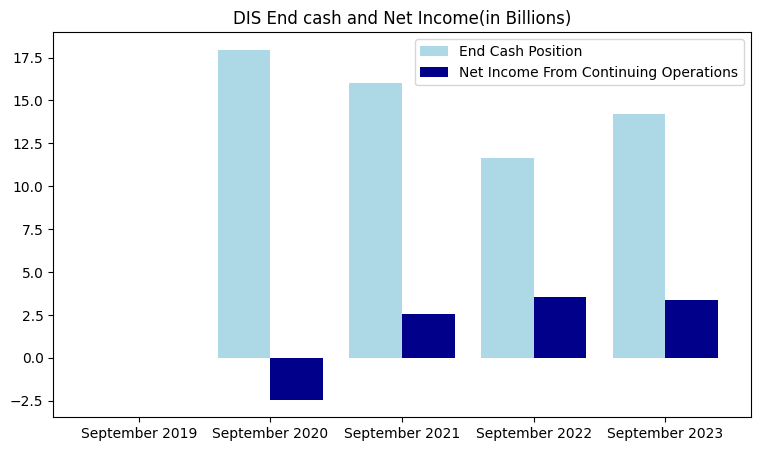

In [ ]:
plt.rcParams['figure.figsize'] = (9,5)
ax = cfs_billions[['End Cash Position', 'Net Income From Continuing Operations']].plot(kind='bar', width=.8, color=['lightblue', 'darkblue'])
plt.xticks(range(len(bs.index)),
           [t.to_pydatetime().strftime("%B %Y") for t in cfs_billions.index],rotation = 360)
plt.title(ticker.upper()+' End cash and Net Income(in Billions)')
plt.show()

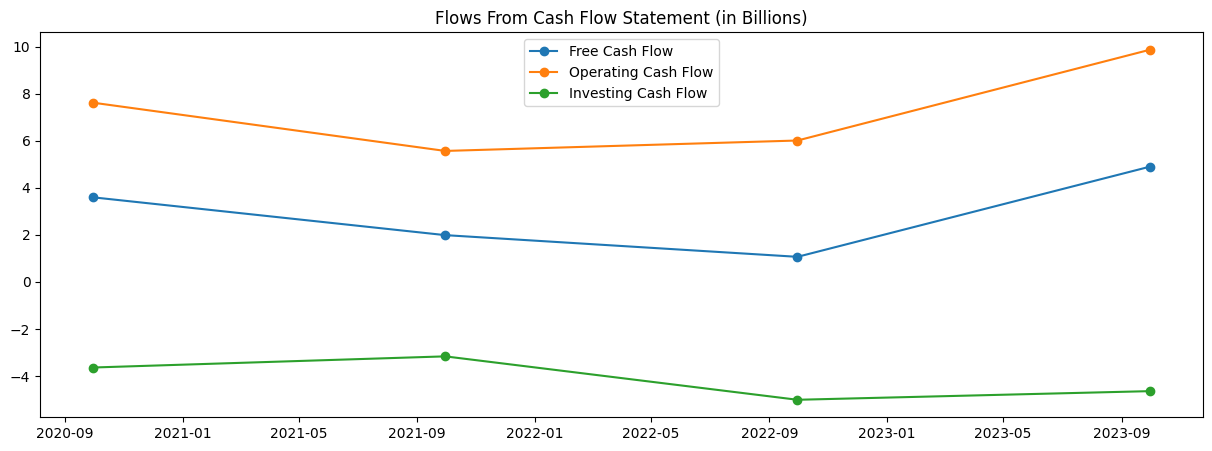

In [ ]:
plt.rcParams['figure.figsize'] = (15,5)
fig = plt.figure()
plt.plot(cfs_billions.index.values, cfs_billions[['Free Cash Flow', 'Operating Cash Flow', 'Investing Cash Flow']], marker='o')
plt.legend(['Free Cash Flow', 'Operating Cash Flow', 'Investing Cash Flow'])
plt.title('Flows From Cash Flow Statement (in Billions)')
plt.show()

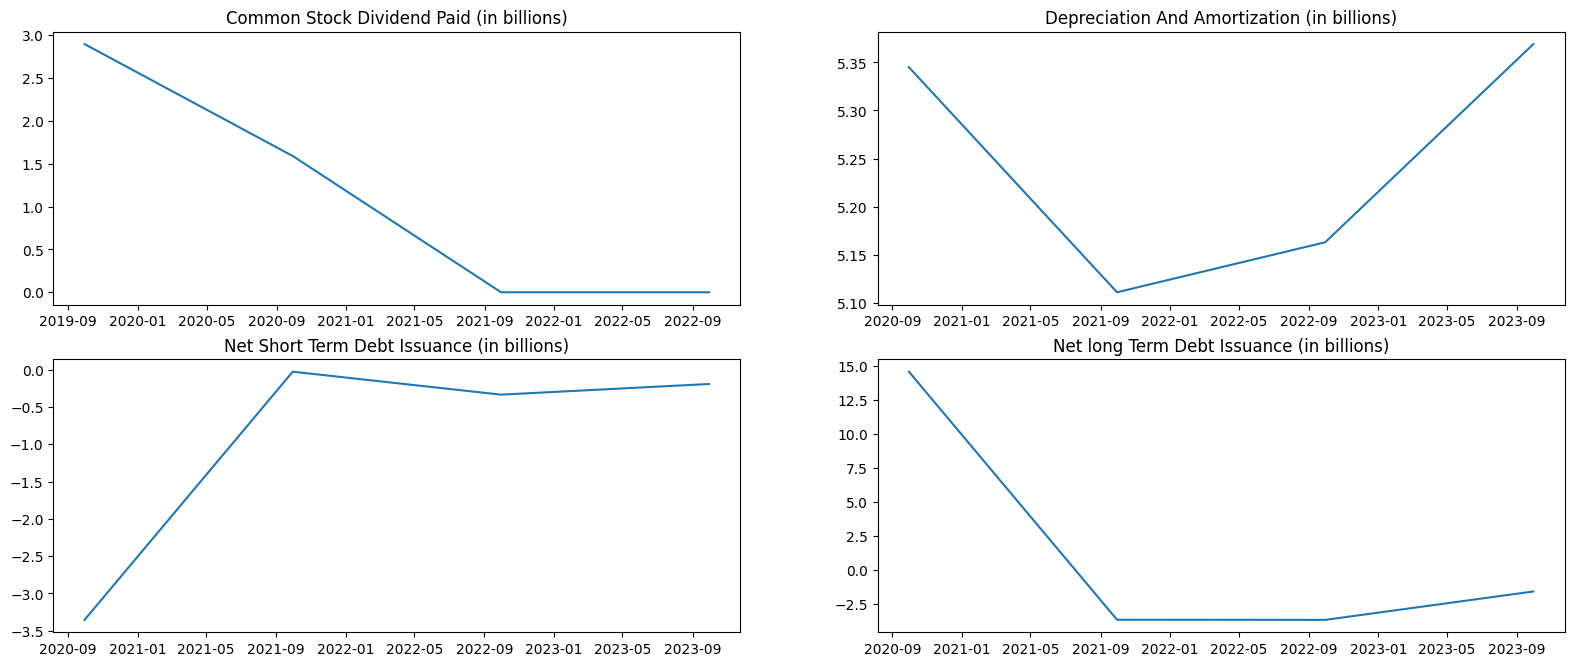

In [ ]:
plt.rcParams['figure.figsize'] = (19.5,7.8)
fig = plt.figure()

ax1 = plt.subplot(2, 2, 1)
plt.plot(cfs_billions.index.values, (cfs_billions['Common Stock Dividend Paid']*-1))

ax2 = plt.subplot(2, 2, 2)
plt.plot(cfs_billions.index.values, cfs_billions['Depreciation And Amortization'])

ax3 = plt.subplot(2, 2, 3)
plt.plot(cfs_billions.index.values, cfs_billions['Net Short Term Debt Issuance'])

ax4 = plt.subplot(2, 2, 4)
plt.plot(cfs_billions.index.values, cfs_billions['Net Long Term Debt Issuance'])

ax1.title.set_text('Common Stock Dividend Paid (in billions)')
ax2.title.set_text('Depreciation And Amortization (in billions)')
ax3.title.set_text('Net Short Term Debt Issuance (in billions)')
ax4.title.set_text('Net long Term Debt Issuance (in billions)')
plt.show()